1. Construct the CNN network, then train the CNN with the full dataset, and test the trained CNN, the accuracy is 0.9903.



In [0]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 17s 279us/step - loss: 0.2757 - acc: 0.9150 - val_loss: 0.0597 - val_acc: 0.9806
Epoch 2/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0900 - acc: 0.9733 - val_loss: 0.0435 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0660 - acc: 0.9800 - val_loss: 0.0363 - val_acc: 0.9876
Epoch 4/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0558 - acc: 0.9831 - val_loss: 0.0329 - val_acc: 0.9895
Epoch 5/12
60000/60000 [===========

2. Print the confusion matrix.

In [0]:
from sklearn.metrics import confusion_matrix
y_predict = model.predict_classes(x_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
matrix = confusion_matrix(y_test, y_predict)
print (matrix)

[[ 977    0    0    0    0    1    1    1    0    0]
 [   0 1132    1    0    0    0    2    0    0    0]
 [   1    2 1022    0    0    0    1    6    0    0]
 [   0    0    1 1003    0    3    0    2    1    0]
 [   0    0    0    0  964    0    4    0    1   13]
 [   1    0    0    5    0  885    1    0    0    0]
 [   5    2    0    0    1    3  946    0    1    0]
 [   0    0    4    1    0    0    0 1021    1    1]
 [   2    0    2    1    0    1    1    3  961    3]
 [   3    0    0    1    2    4    0    4    3  992]]


3. Perform Batch normalization at the very begining of the CNN network. And the test accuracy is 0.9908. Which is higher then above result.

In [0]:
#Batch normalization

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# add batch normolization
model = Sequential()
#batch normalization
model.add(BatchNormalization()) # add here
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.2165 - acc: 0.9325 - val_loss: 0.0503 - val_acc: 0.9831
Epoch 2/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0763 - acc: 0.9775 - val_loss: 0.0360 - val_acc: 0.9882
Epoch 3/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0586 - acc: 0.9822 - val_loss: 0.0325 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0471 - acc: 0.9858 - val_loss: 0.0307 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0403 - acc: 0.9881 - val_loss: 0.0286 - val_acc: 0.9911
Epoch 6/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0341 - acc: 0.9897 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 7/12
60000/60000 [=======================

4. Perform image standardization to the CNN network, and the test accuracy is 0.9918, again higher then before.

In [0]:
#Image standardization

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#image standardization
#1. feature-wise generator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    )
#2. calculate mean and standard deviation on the training dataset
datagen.fit(x_train)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.2640 - acc: 0.9193 - val_loss: 0.0524 - val_acc: 0.9824
Epoch 2/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0856 - acc: 0.9739 - val_loss: 0.0386 - val_acc: 0.9875
Epoch 3/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0626 - acc: 0.9817 - val_loss: 0.0350 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0522 - acc: 0.9842 - val_loss: 0.0276 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0463 - acc: 0.9862 - val_loss: 0.0291 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0400 - acc: 0.9877 - val_loss: 0.0283 - val_acc: 0.9906
Epoch 7/12
60000/60000 [========================

5. Perform both Batch Normalization and Image Standardization to the CNN network, and the accuracy is 0.9917, almost the same as before.

In [0]:
#Both Batch Normalization and Image standardization

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#image standardization
#1. feature-wise generator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip=True
    )
#2. calculate mean and standard deviation on the training dataset
datagen.fit(x_train)
# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                    steps_per_epoch=len(x_train) / 32, epochs=epochs)
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.2364 - acc: 0.9273 - val_loss: 0.0552 - val_acc: 0.9817
Epoch 2/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0835 - acc: 0.9753 - val_loss: 0.0460 - val_acc: 0.9845
Epoch 3/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0610 - acc: 0.9822 - val_loss: 0.0315 - val_acc: 0.9894
Epoch 4/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0496 - acc: 0.9852 - val_loss: 0.0284 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0423 - acc: 0.9867 - val_loss: 0.0341 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0370 - acc: 0.9885 - val_loss: 0.0301 - val_acc: 0.9900
Epoch 7/12
60000/60000 [=======================

6. Then we add a new convolutional layer to the CNN, and perform no Batch Normalization and Image Standardization. The test accuracy is 0.9944, which is among the highest of the above designs.

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 260us/step - loss: 0.2596 - acc: 0.9201 - val_loss: 0.0517 - val_acc: 0.9847
Epoch 2/12
60000/60000 [==============================] - 15s 249us/step - loss: 0.0775 - acc: 0.9763 - val_loss: 0.0375 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 15s 249us/step - loss: 0.0573 - acc: 0.9831 - val_loss: 0.0316 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 15s 248us/step - loss: 0.0494 - acc: 0.9860 - val_loss: 0.0239 - val_acc: 0.9921
Epoch 5/12
60000/60000 [==============================] - 15s 248us/step - loss: 0.0413 - acc: 0.9877 - val_loss: 0.0247 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 15s 250us/step - loss: 0.0351 - acc: 0.9899 - val_loss: 0.0241 - val_acc: 0.9917
Epoch 7/12
60000/60000 [===================

7. Then we add a new convolutional layer to the CNN, and perform both Batch Normalization and Image Standardization. The test accuracy is 0.994, which is among the highest of the above designs.

In [0]:
#Both Batch Normalization and Image standardization
#Add a new convoulutional layer

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#image standardization
#1. feature-wise generator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    )
#2. calculate mean and standard deviation on the training dataset
datagen.fit(x_train)
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), #convolution layer 1
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) #activate layer 1
model.add(Conv2D(32, kernel_size=(3, 3), #convolution layer 2
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) #activate layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 331us/step - loss: 0.2165 - acc: 0.9344 - val_loss: 0.0456 - val_acc: 0.9852
Epoch 2/12
60000/60000 [==============================] - 16s 259us/step - loss: 0.0709 - acc: 0.9794 - val_loss: 0.0484 - val_acc: 0.9838
Epoch 3/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.0529 - acc: 0.9841 - val_loss: 0.0276 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.0430 - acc: 0.9871 - val_loss: 0.0290 - val_acc: 0.9901
Epoch 5/12
60000/60000 [=======

8. Then we add two new convolutional layer to the CNN, and perform both Batch Normalization and Image Standardization. The test accuracy is 0.9931, which is among the highest of the above designs.

In [0]:
#Both Batch Normalization and Image standardization
#Add a new convoulutional layer
#Add a new convoulutional layer

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#image standardization
#1. feature-wise generator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip=True
    )
#2. calculate mean and standard deviation on the training dataset
datagen.fit(x_train)
# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                    steps_per_epoch=len(x_train) / 32, epochs=epochs)
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), #convolution layer 1
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) #activate layer 1
model.add(Conv2D(32, kernel_size=(3, 3), #convolution layer 2
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) #activate layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 272us/step - loss: 0.2415 - acc: 0.9253 - val_loss: 0.0642 - val_acc: 0.9798
Epoch 2/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.0782 - acc: 0.9762 - val_loss: 0.0318 - val_acc: 0.9886
Epoch 3/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.0556 - acc: 0.9836 - val_loss: 0.0300 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0452 - acc: 0.9871 - val_loss: 0.0252 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.0382 - acc: 0.9889 - val_loss: 0.0294 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.0334 - acc: 0.9905 - val_loss: 0.0222 - val_acc: 0.9925
Epoch 7/12
60000/60000 [===================

9. As we found that no Batch Normalization and Image Standardization, but just add one more layer to the CNN can perform the best, so we choose this design as the base, then change the value of the batch size and epoch.

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change batch size to 64, epoch is 12
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 64
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 338us/step - loss: 0.1917 - acc: 0.9413 - val_loss: 0.0369 - val_acc: 0.9879
Epoch 2/12
60000/60000 [==============================] - 19s 318us/step - loss: 0.0683 - acc: 0.9807 - val_loss: 0.0349 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 19s 318us/step - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0256 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 19s 318us/step - loss: 0.0434 - acc: 0.9871 - val_loss: 0.0276 - val_acc: 0.9903
Epoch 5/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.0383 - acc: 0.9890 - val_loss: 0.0244 - val_acc: 0.9917
Epoch 6/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.0329 - acc: 0.9910 - val_loss: 0.0252 - val_acc: 0.9915
Epoch 7/12
60000/60000 [===================

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change batch size to 256, epoch is 12
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 256
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 216us/step - loss: 0.3539 - acc: 0.8915 - val_loss: 0.0580 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0924 - acc: 0.9722 - val_loss: 0.0380 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0651 - acc: 0.9810 - val_loss: 0.0404 - val_acc: 0.9859
Epoch 4/12
60000/60000 [==============================] - 12s 195us/step - loss: 0.0546 - acc: 0.9835 - val_loss: 0.0316 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 12s 196us/step - loss: 0.0465 - acc: 0.9863 - val_loss: 0.0277 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 12s 194us/step - loss: 0.0395 - acc: 0.9880 - val_loss: 0.0347 - val_acc: 0.9882
Epoch 7/12
60000/60000 [===================

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 4, batch size is 128
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 16s 269us/step - loss: 0.2751 - acc: 0.9151 - val_loss: 0.0463 - val_acc: 0.9844
Epoch 2/4
60000/60000 [==============================] - 15s 248us/step - loss: 0.0788 - acc: 0.9775 - val_loss: 0.0298 - val_acc: 0.9895
Epoch 3/4
60000/60000 [==============================] - 15s 248us/step - loss: 0.0575 - acc: 0.9831 - val_loss: 0.0284 - val_acc: 0.9903
Epoch 4/4
60000/60000 [==============================] - 15s 248us/step - loss: 0.0456 - acc: 0.9868 - val_loss: 0.0236 - val_acc: 0.9916
Test loss: 0.02355459110240481
Test accuracy: 0.9916


In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 8, batch size is 128
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 8

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 16s 271us/step - loss: 0.2431 - acc: 0.9246 - val_loss: 0.0453 - val_acc: 0.9849
Epoch 2/8
60000/60000 [==============================] - 15s 248us/step - loss: 0.0757 - acc: 0.9776 - val_loss: 0.0319 - val_acc: 0.9888
Epoch 3/8
60000/60000 [==============================] - 15s 250us/step - loss: 0.0575 - acc: 0.9832 - val_loss: 0.0295 - val_acc: 0.9906
Epoch 4/8
60000/60000 [==============================] - 15s 248us/step - loss: 0.0487 - acc: 0.9859 - val_loss: 0.0257 - val_acc: 0.9907
Epoch 5/8
60000/60000 [==============================] - 15s 248us/step - loss: 0.0400 - acc: 0.9886 - val_loss: 0.0235 - val_acc: 0.9926
Epoch 6/8
60000/60000 [==============================] - 15s 251us/step - loss: 0.0358 - acc: 0.9895 - val_loss: 0.0235 - val_acc: 0.9922
Epoch 7/8
60000/60000 [==========================

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 16, batch size is 128
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 16

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 16s 273us/step - loss: 0.2607 - acc: 0.9195 - val_loss: 0.0491 - val_acc: 0.9833
Epoch 2/16
60000/60000 [==============================] - 15s 248us/step - loss: 0.0812 - acc: 0.9759 - val_loss: 0.0391 - val_acc: 0.9866
Epoch 3/16
60000/60000 [==============================] - 15s 248us/step - loss: 0.0564 - acc: 0.9835 - val_loss: 0.0300 - val_acc: 0.9894
Epoch 4/16
60000/60000 [==============================] - 15s 248us/step - loss: 0.0479 - acc: 0.9854 - val_loss: 0.0301 - val_acc: 0.9911
Epoch 5/16
60000/60000 [==============================] - 15s 249us/step - loss: 0.0415 - acc: 0.9882 - val_loss: 0.0239 - val_acc: 0.9931
Epoch 6/16
60000/60000 [==============================] - 15s 249us/step - loss: 0.0348 - acc: 0.9896 - val_loss: 0.0211 - val_acc: 0.9932
Epoch 7/16
60000/60000 [===================

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 4, batch size is 64
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 64
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 21s 350us/step - loss: 0.1964 - acc: 0.9405 - val_loss: 0.0481 - val_acc: 0.9846
Epoch 2/4
60000/60000 [==============================] - 20s 327us/step - loss: 0.0701 - acc: 0.9794 - val_loss: 0.0344 - val_acc: 0.9890
Epoch 3/4
60000/60000 [==============================] - 19s 323us/step - loss: 0.0514 - acc: 0.9845 - val_loss: 0.0247 - val_acc: 0.9908
Epoch 4/4
60000/60000 [==============================] - 19s 322us/step - loss: 0.0432 - acc: 0.9872 - val_loss: 0.0249 - val_acc: 0.9920
Test loss: 0.02493820607790476
Test accuracy: 0.992


In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 8, batch size is 64
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 64
num_classes = 10
epochs = 8

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 21s 351us/step - loss: 0.2011 - acc: 0.9382 - val_loss: 0.0483 - val_acc: 0.9854
Epoch 2/8
60000/60000 [==============================] - 19s 325us/step - loss: 0.0696 - acc: 0.9795 - val_loss: 0.0366 - val_acc: 0.9875
Epoch 3/8
60000/60000 [==============================] - 19s 323us/step - loss: 0.0514 - acc: 0.9851 - val_loss: 0.0263 - val_acc: 0.9912
Epoch 4/8
60000/60000 [==============================] - 19s 323us/step - loss: 0.0432 - acc: 0.9874 - val_loss: 0.0257 - val_acc: 0.9906
Epoch 5/8
60000/60000 [==============================] - 19s 325us/step - loss: 0.0372 - acc: 0.9891 - val_loss: 0.0224 - val_acc: 0.9925
Epoch 6/8
60000/60000 [==============================] - 19s 323us/step - loss: 0.0329 - acc: 0.9901 - val_loss: 0.0213 - val_acc: 0.9935
Epoch 7/8
60000/60000 [==========================

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 16, batch size is 64
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 64
num_classes = 10
epochs = 16

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 21s 349us/step - loss: 0.2154 - acc: 0.9355 - val_loss: 0.0525 - val_acc: 0.9820
Epoch 2/16
60000/60000 [==============================] - 19s 322us/step - loss: 0.0713 - acc: 0.9795 - val_loss: 0.0354 - val_acc: 0.9883
Epoch 3/16
60000/60000 [==============================] - 19s 322us/step - loss: 0.0545 - acc: 0.9844 - val_loss: 0.0294 - val_acc: 0.9908
Epoch 4/16
60000/60000 [==============================] - 19s 322us/step - loss: 0.0458 - acc: 0.9865 - val_loss: 0.0280 - val_acc: 0.9898
Epoch 5/16
60000/60000 [==============================] - 20s 327us/step - loss: 0.0396 - acc: 0.9887 - val_loss: 0.0255 - val_acc: 0.9919
Epoch 6/16
60000/60000 [==============================] - 20s 325us/step - loss: 0.0358 - acc: 0.9893 - val_loss: 0.0289 - val_acc: 0.9905
Epoch 7/16
60000/60000 [===================

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 4, batch size is 256
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 256
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 14s 225us/step - loss: 0.3458 - acc: 0.8919 - val_loss: 0.1046 - val_acc: 0.9690
Epoch 2/4
60000/60000 [==============================] - 12s 196us/step - loss: 0.0954 - acc: 0.9715 - val_loss: 0.0406 - val_acc: 0.9867
Epoch 3/4
60000/60000 [==============================] - 12s 197us/step - loss: 0.0690 - acc: 0.9792 - val_loss: 0.0357 - val_acc: 0.9871
Epoch 4/4
60000/60000 [==============================] - 12s 195us/step - loss: 0.0542 - acc: 0.9837 - val_loss: 0.0344 - val_acc: 0.9882
Test loss: 0.03436271249791607
Test accuracy: 0.9882


In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 8, batch size is 256
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 256
num_classes = 10
epochs = 8

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 14s 228us/step - loss: 0.3708 - acc: 0.8837 - val_loss: 0.0629 - val_acc: 0.9795
Epoch 2/8
60000/60000 [==============================] - 12s 197us/step - loss: 0.0945 - acc: 0.9719 - val_loss: 0.0387 - val_acc: 0.9872
Epoch 3/8
60000/60000 [==============================] - 12s 195us/step - loss: 0.0695 - acc: 0.9798 - val_loss: 0.0328 - val_acc: 0.9886
Epoch 4/8
60000/60000 [==============================] - 12s 197us/step - loss: 0.0560 - acc: 0.9836 - val_loss: 0.0266 - val_acc: 0.9915
Epoch 5/8
60000/60000 [==============================] - 12s 196us/step - loss: 0.0464 - acc: 0.9861 - val_loss: 0.0294 - val_acc: 0.9897
Epoch 6/8
60000/60000 [==============================] - 12s 196us/step - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0241 - val_acc: 0.9920
Epoch 7/8
60000/60000 [==========================

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
#change epoch to 16, batch size is 256
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 256
num_classes = 10
epochs = 16

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 14s 229us/step - loss: 0.3638 - acc: 0.8866 - val_loss: 0.0703 - val_acc: 0.9777
Epoch 2/16
60000/60000 [==============================] - 12s 197us/step - loss: 0.0918 - acc: 0.9727 - val_loss: 0.0345 - val_acc: 0.9888
Epoch 3/16
60000/60000 [==============================] - 12s 197us/step - loss: 0.0656 - acc: 0.9807 - val_loss: 0.0304 - val_acc: 0.9892
Epoch 4/16
60000/60000 [==============================] - 12s 197us/step - loss: 0.0539 - acc: 0.9848 - val_loss: 0.0306 - val_acc: 0.9900
Epoch 5/16
60000/60000 [==============================] - 12s 197us/step - loss: 0.0446 - acc: 0.9862 - val_loss: 0.0295 - val_acc: 0.9905
Epoch 6/16
60000/60000 [==============================] - 12s 197us/step - loss: 0.0389 - acc: 0.9884 - val_loss: 0.0245 - val_acc: 0.9925
Epoch 7/16
60000/60000 [===================

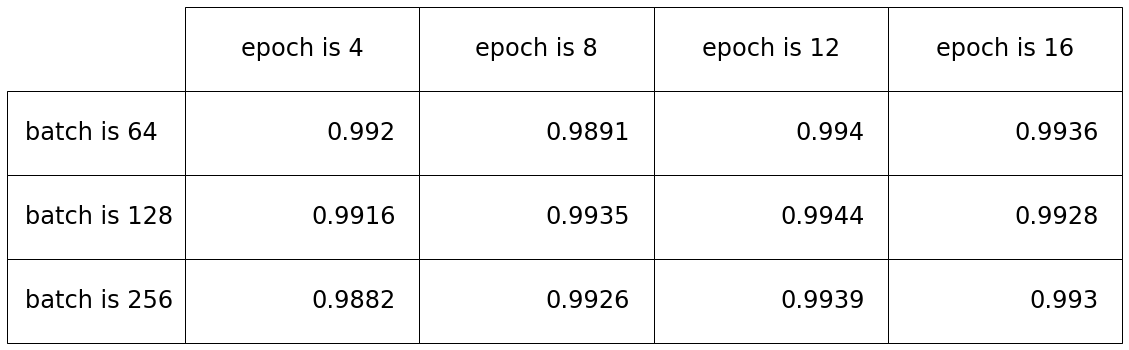

In [0]:
'''import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
col_labels = ['epoch is 4','epoch is 8','epoch is 12','epoch is 16']
row_labels = ['batch is 64','batch is 128','batch is 256']
table_vals = [[0.992,0.9891,0.994,0.9936],[0.9916,0.9935,0.9944,0.9928],[0.9882,0.9926,0.9939,0.993]]

the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 3,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(4, 5)
# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)'''
import matplotlib.pyplot as plt

fig = plt.figure()
col_labels = ['epoch is 4','epoch is 8','epoch is 12','epoch is 16']
row_labels = ['batch is 64','batch is 128','batch is 256']
table_vals = [[0.992,0.9891,0.994,0.9936],[0.9916,0.9935,0.9944,0.9928],[0.9882,0.9926,0.9939,0.993]]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 4,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center'
                      )
the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(7, 7)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)

10. From the table above, we can see that when the batch is 128, and theepoch is 12, the CNN can perform the best.

In [0]:

#No Batch Normalization and Image standardization
#Add a new convoulutional layer
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.2561 - acc: 0.9214 - val_loss: 0.0534 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0808 - acc: 0.9760 - val_loss: 0.0367 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0591 - acc: 0.9828 - val_loss: 0.0321 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0499 - acc: 0.9850 - val_loss: 0.0283 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0422 - acc: 0.9876 - val_loss: 0.0261 - val_acc: 0.9913
Epoch 6/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0371 - acc: 0.9893 - val_loss: 0.0281 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================]

In [0]:
from sklearn.metrics import confusion_matrix
y_predict = model.predict_classes(x_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
matrix = confusion_matrix(y_test, y_predict)
print (matrix)

[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1133    0    0    0    1    0    1    0    0]
 [   1    2 1023    0    0    0    0    6    0    0]
 [   0    0    1 1008    0    1    0    0    0    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   1    0    0    8    0  881    1    1    0    0]
 [   5    3    0    0    2    3  945    0    0    0]
 [   0    2    3    1    0    0    0 1020    1    1]
 [   2    0    2    1    0    1    0    1  965    2]
 [   0    0    0    0    5    4    0    4    1  995]]
